# <font color='blue' face='times new roman' size='6'>K-Means Clustering on the 'Old Faithful Geyser' Dataset</font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.stats import multivariate_normal

# <font color='black' face='times new roman' size='5'>Importing 'Old Faithful Geyser' Dataset</font>

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/gchoi/Dataset/master/OldFaithful.csv')
df.head()

,TimeEruption,TimeWaiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


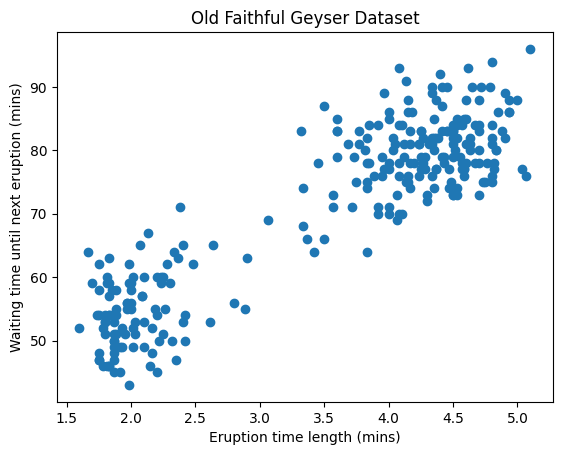

In [3]:
OF_data = df.to_numpy()  #old-faithful data
x = OF_data[:, 0]  # eruption time length
y = OF_data[:, 1]  # waiting time until next eruption

plt.scatter(x, y)
plt.title('Old Faithful Geyser Dataset')
plt.xlabel('Eruption time length (mins)')
plt.ylabel('Waiting time until next eruption (mins)')
plt.show()

# <font color='dark orange' face='times new roman' size='5.5'>K-Means Algorithm</font>

In [7]:
epochs = 1000

def init_centroids(data, K):

    # Randomly choose 'K' initial centroids from the data
    return data[np.random.choice(data.shape[0], K, replace=False)]

def cluster_assignment(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis, :] - centroids, axis=2)
    j = np.argmin(distances, axis=1)
    return j

def centroids_update(data, clusters, K):
    new_centroids = np.zeros_like(data[:K])
    for j in range(K):
        cluster_points = data[clusters==j]
        if(len(cluster_points) > 0):
            new_centroids[j] = np.mean(cluster_points, axis=0)
    return new_centroids


def J(centroids, clusters, data):
    total_cost = 0

    for i in range(len(centroids)):
        X_i = data[clusters == i]
        centroid_i = centroids[i]
        distances = np.linalg.norm(X_i - centroid_i, axis=1)
        total_cost += np.sum(distances ** 2)
    return total_cost

def K_MEANS(data, K, plot=True):

    centroids = data[np.random.choice(data.shape[0], K, replace=False)]

    cost_history = []

    plt.figure(figsize=(10, 5))

    for itr in range(epochs):
        clusters = cluster_assignment(data, centroids)
        new_centroids = centroids_update(data, clusters, K)
        cost = J(new_centroids, clusters, data)
        cost_history.append(cost)

        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

        if plot:
            plt.clf()
            plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='winter', alpha=0.5)
            plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', c='red', s=200, label='Centroids')
            plt.title(f'Iteration {itr + 1}')
            plt.xlabel('Eruption Time (minutes)')
            plt.ylabel('Waiting Time (minutes)')
            plt.legend()
            plt.pause(0.5)  # Adjust pause time as needed
            plt.show()

    return clusters, centroids, cost_history

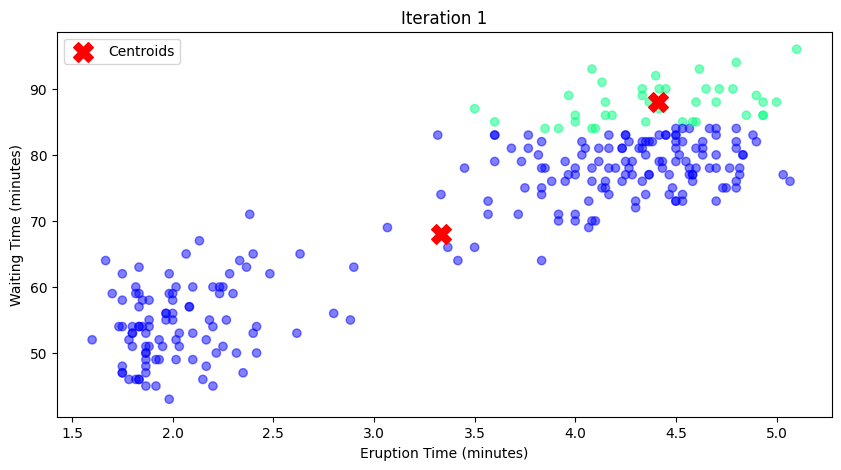

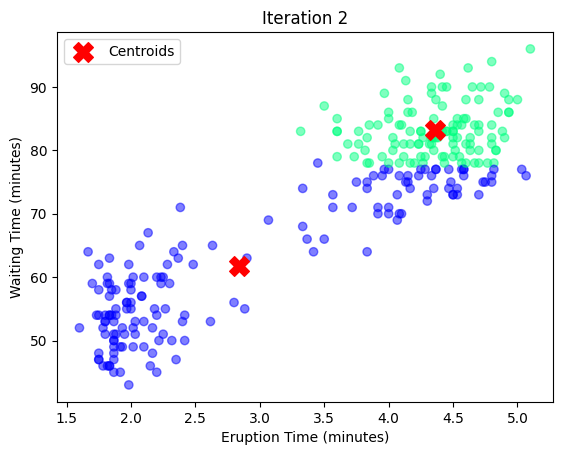

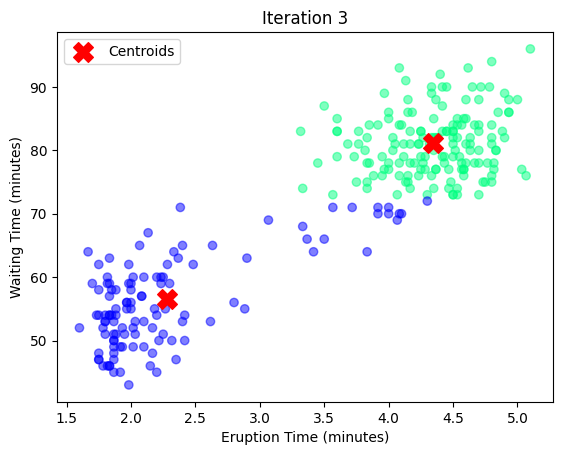

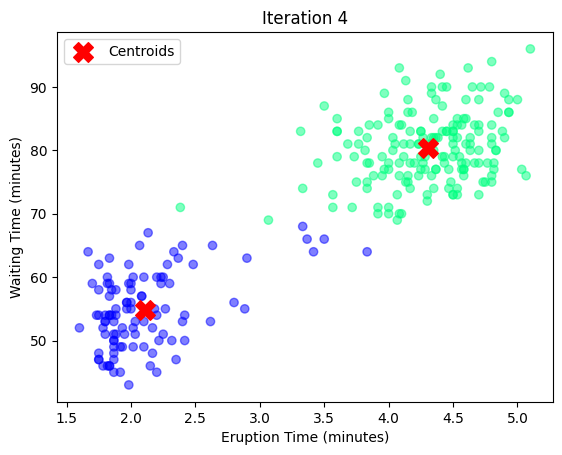

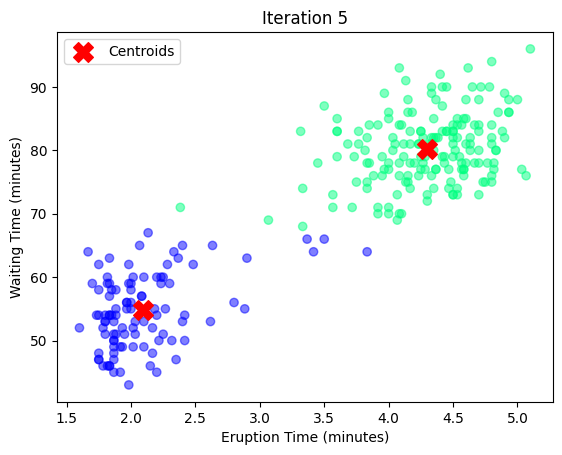

In [8]:
K = 2
clusters, opt_centroids, cost_history = K_MEANS(OF_data, K)

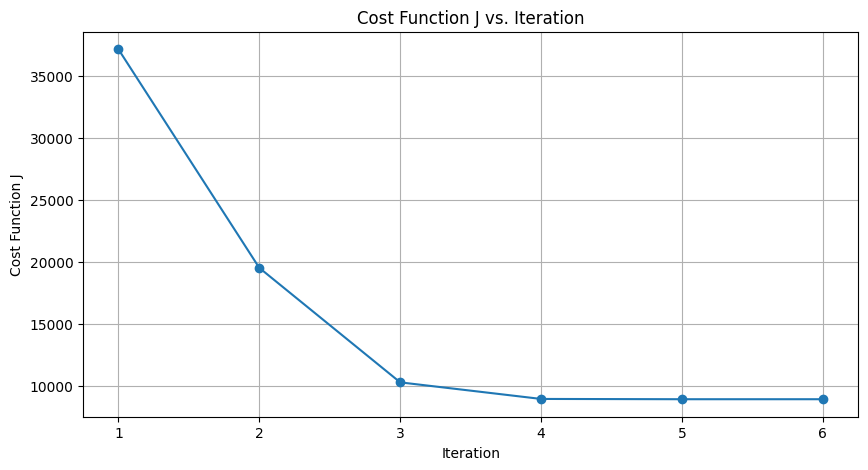

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cost_history) + 1), cost_history, marker='o')
plt.title('Cost Function J vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Cost Function J')
plt.grid(True)
plt.show()

# <font color='red' face='times new roman' size='5'>The cost function plot demonstrates the convergence of the algorithm over iterations, indicating that further iterations do not significantly reduce the overall cost</font>